# IMDB Case Study
In this Project, I will try to find some interesting insights into a few movies released between 1916 and 2016, using Python. 
Downloaded a movie dataset, writing Python code to explore the data, gain insights into the movies, actors, directors, and collections.

##### Tech Stack used- Google colab

In [152]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
# Import the numpy and pandas packages

import numpy as np
import pandas as pd

## Task 1: Reading and Inspection

-  ### Subtask 1.1: Import and read

Import and read the movie database. Store it in a variable called `movies`.

In [155]:
movies = pd.read_csv("/content/drive/MyDrive/Dataset/IMDB_Movies.csv")# Write your code for importing the csv file here
movies

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


-  ### Subtask 1.2: Inspect the dataframe

Inspect the dataframe's columns, shapes, variable types etc.

In [156]:
# Write your code for inspection here
print(movies.shape)
print(movies.describe())
print(movies.info())



(5043, 28)
       num_critic_for_reviews     duration  ...  aspect_ratio  movie_facebook_likes
count             4993.000000  5028.000000  ...   4714.000000           5043.000000
mean               140.194272   107.201074  ...      2.220403           7525.964505
std                121.601675    25.197441  ...      1.385113          19320.445110
min                  1.000000     7.000000  ...      1.180000              0.000000
25%                 50.000000    93.000000  ...      1.850000              0.000000
50%                110.000000   103.000000  ...      2.350000            166.000000
75%                195.000000   118.000000  ...      2.350000           3000.000000
max                813.000000   511.000000  ...     16.000000         349000.000000

[8 rows x 15 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     -------------- 

## Task 2: Cleaning the Data

-  ### Subtask 2.1: Inspect Null values

Find out the number of Null values in all the columns and rows. Also, find the percentage of Null values in each column. Round off the percentages upto two decimal places.

In [157]:
# Write your code for column-wise null count here
print(movies.isnull().sum())

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [158]:
# Write your code for row-wise null count here
percent_missing_rows = (movies.isnull().sum(axis=1) * 100 / len(movies)).round(2)

percent_missing_rows

0       0.00
1       0.00
2       0.00
3       0.00
4       0.26
        ... 
5038    0.08
5039    0.10
5040    0.08
5041    0.04
5042    0.00
Length: 5043, dtype: float64

In [159]:
# Write your code for column-wise null percentages here
percent_missing = (movies.isnull().sum() * 100 / len(movies)).round(2)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
color,0.38
director_name,2.06
num_critic_for_reviews,0.99
duration,0.30
director_facebook_likes,2.06
actor_3_facebook_likes,0.46
actor_2_name,0.26
actor_1_facebook_likes,0.14
gross,17.53
genres,0.00


-  ### Subtask 2.2: Drop unecessary columns

For this assignment, you will mostly be analyzing the movies with respect to the ratings, gross collection, popularity of movies, etc. So many of the columns in this dataframe are not required. So it is advised to drop the following columns.
-  color
-  director_facebook_likes
-  actor_1_facebook_likes
-  actor_2_facebook_likes
-  actor_3_facebook_likes
-  actor_2_name
-  cast_total_facebook_likes
-  actor_3_name
-  duration
-  facenumber_in_poster
-  content_rating
-  country
-  movie_imdb_link
-  aspect_ratio
-  plot_keywords

In [160]:
# Write your code for dropping the columns here. It is advised to keep inspecting the dataframe after each set of operations 
movies = movies.drop(labels=["color","director_facebook_likes","actor_1_facebook_likes","actor_2_facebook_likes", "actor_3_facebook_likes","actor_2_name","cast_total_facebook_likes",
                    "actor_3_name","duration","facenumber_in_poster","content_rating","country","movie_imdb_link","aspect_ratio","plot_keywords"],axis=1)
movies.shape
percent_missing = (movies.isnull().sum() * 100 / len(movies)).round(2)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df

,percent_missing
director_name,2.06
num_critic_for_reviews,0.99
gross,17.53
genres,0.00
actor_1_name,0.14
movie_title,0.00
num_voted_users,0.00
num_user_for_reviews,0.40
language,0.24
budget,9.76


-  ### Subtask 2.3: Drop unecessary rows using columns with high Null percentages

Now, on inspection you might notice that some columns have large percentage (greater than 5%) of Null values. Drop all the rows which have Null values for such columns.

In [161]:
# Write your code for dropping the rows here
movies = movies[~np.isnan(movies['gross'])]
movies = movies[~np.isnan(movies['budget'])]

movies = movies[movies.isnull().sum(axis=1) <= 5]
movies.shape
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237000000.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300000000.0,2007.0,7.1,0
2,Sam Mendes,602.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245000000.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250000000.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263700000.0,2012.0,6.6,24000


-  ### Subtask 2.4: Fill NaN values

You might notice that the `language` column has some NaN values. Here, on inspection, you will see that it is safe to replace all the missing values with `'English'`.

In [162]:
# Write your code for filling the NaN values in the 'language' column here

movies["language"] = movies.language.fillna("English")
movies.language.isnull().sum()

0

-  ### Subtask 2.5: Check the number of retained rows

You might notice that two of the columns viz. `num_critic_for_reviews` and `actor_1_name` have small percentages of NaN values left. You can let these columns as it is for now. Check the number and percentage of the rows retained after completing all the tasks above.

In [163]:
# Write your code for checking number of retained rows here
len(movies.index)/5043

0.7715645449137418

**Checkpoint 1:** You might have noticed that we still have around `77%` of the rows!

## Task 3: Data Analysis

-  ### Subtask 3.1: Change the unit of columns

Convert the unit of the `budget` and `gross` columns from `$` to `million $`.

In [164]:
# Write your code for unit conversion here
budget_d = (movies["budget"]/1000000).round(2)
movies.budget = budget_d
gross_d = (movies["gross"]/1000000).round(2)
movies.gross = gross_d
movies.head(5)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes
0,James Cameron,723.0,760.51,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000
1,Gore Verbinski,302.0,309.40,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300.0,2007.0,7.1,0
2,Sam Mendes,602.0,200.07,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245.0,2015.0,6.8,85000
3,Christopher Nolan,813.0,448.13,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250.0,2012.0,8.5,164000
5,Andrew Stanton,462.0,73.06,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263.7,2012.0,6.6,24000


In [165]:
movies["num_user_for_reviews"]=movies["num_user_for_reviews"].astype(str).astype(int)
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3891 entries, 0 to 5042
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   director_name           3891 non-null   object 
 1   num_critic_for_reviews  3890 non-null   float64
 2   gross                   3891 non-null   float64
 3   genres                  3891 non-null   object 
 4   actor_1_name            3888 non-null   object 
 5   movie_title             3891 non-null   object 
 6   num_voted_users         3891 non-null   int64  
 7   num_user_for_reviews    3891 non-null   int64  
 8   language                3891 non-null   object 
 9   budget                  3891 non-null   float64
 10  title_year              3891 non-null   float64
 11  imdb_score              3891 non-null   float64
 12  movie_facebook_likes    3891 non-null   int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 425.6+ KB
None


-  ### Subtask 3.2: Find the movies with highest profit

    1. Create a new column called `profit` which contains the difference of the two columns: `gross` and `budget`.
    2. Sort the dataframe using the `profit` column as reference.
    3. Plot `profit` (y-axis) vs `budget` (x- axis) and observe the outliers using the appropriate chart type.
    4. Extract the top ten profiting movies in descending order and store them in a new dataframe - `top10`

In [166]:
# Write your code for creating the profit column here
profit = movies["gross"]-movies["budget"]
movies["profit"] = profit
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.51,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.51
1,Gore Verbinski,302.0,309.40,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,1238,English,300.0,2007.0,7.1,0,9.40
2,Sam Mendes,602.0,200.07,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,994,English,245.0,2015.0,6.8,85000,-44.93
3,Christopher Nolan,813.0,448.13,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,2701,English,250.0,2012.0,8.5,164000,198.13
5,Andrew Stanton,462.0,73.06,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,738,English,263.7,2012.0,6.6,24000,-190.64


In [167]:
# Write your code for sorting the dataframe here
movies = movies.sort_values("profit",ascending=False)
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.51,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.51
29,Colin Trevorrow,644.0,652.18,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.18
26,James Cameron,315.0,658.67,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.67
3024,George Lucas,282.0,460.94,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.94
3080,Steven Spielberg,215.0,434.95,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.45


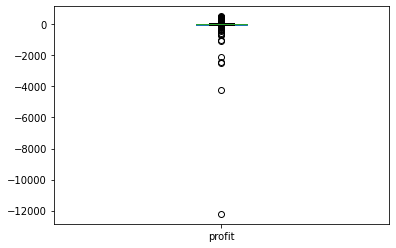

In [168]:
# Write code for profit vs budget plot here
import matplotlib.pyplot as plt
movies.plot("budget", "profit", kind="box")
plt.show()

In [169]:
# Write your code to get the top 10 profiting movies here
top_10 = movies.sort_values("profit", ascending=False)
top_10.head(10)

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.51,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.51
29,Colin Trevorrow,644.0,652.18,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.18
26,James Cameron,315.0,658.67,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.67
3024,George Lucas,282.0,460.94,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.94
3080,Steven Spielberg,215.0,434.95,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.45
794,Joss Whedon,703.0,623.28,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.28
17,Joss Whedon,703.0,623.28,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.28
509,Roger Allers,186.0,422.78,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656,English,45.0,1994.0,8.5,17000,377.78
240,George Lucas,320.0,474.54,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597,English,115.0,1999.0,6.5,13000,359.54
66,Christopher Nolan,645.0,533.32,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.32


-  ### Subtask 3.3: Drop duplicate values

After you found out the top 10 profiting movies, you might have noticed a duplicate value. So, it seems like the dataframe has duplicate values as well. Drop the duplicate values from the dataframe and repeat `Subtask 3.2`. Note that the same `movie_title` can be there in different languages. 

In [170]:
# Write your code for dropping duplicate values here
movies = movies.drop_duplicates()

In [171]:
# Write code for repeating subtask 2 here
top_10 = movies.head(10)
top_10

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit
0,James Cameron,723.0,760.51,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.51
29,Colin Trevorrow,644.0,652.18,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.18
26,James Cameron,315.0,658.67,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.67
3024,George Lucas,282.0,460.94,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.94
3080,Steven Spielberg,215.0,434.95,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.45
794,Joss Whedon,703.0,623.28,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,1722,English,220.0,2012.0,8.1,123000,403.28
509,Roger Allers,186.0,422.78,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,656,English,45.0,1994.0,8.5,17000,377.78
240,George Lucas,320.0,474.54,Action|Adventure|Fantasy|Sci-Fi,Natalie Portman,Star Wars: Episode I - The Phantom Menace,534658,3597,English,115.0,1999.0,6.5,13000,359.54
66,Christopher Nolan,645.0,533.32,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.0,2008.0,9.0,37000,348.32
439,Gary Ross,673.0,408.00,Adventure|Drama|Sci-Fi|Thriller,Jennifer Lawrence,The Hunger Games,701607,1959,English,78.0,2012.0,7.3,140000,330.00


**Checkpoint 2:** You might spot two movies directed by `James Cameron` in the list.

-  ### Subtask 3.4: Find IMDb Top 250

    1. Create a new dataframe `IMDb_Top_250` and store the top 250 movies with the highest IMDb Rating (corresponding to the column: `imdb_score`). Also make sure that for all of these movies, the `num_voted_users` is greater than 25,000.
Also add a `Rank` column containing the values 1 to 250 indicating the ranks of the corresponding films.
    2. Extract all the movies in the `IMDb_Top_250` dataframe which are not in the English language and store them in a new dataframe named `Top_Foreign_Lang_Film`.

In [172]:
# Write your code for extracting the top 250 movies as per the IMDb score here. Make sure that you store it in a new dataframe 
# and name that dataframe as 'IMDb_Top_250'
IMDB_Top_250 = movies[movies["num_voted_users"]>25000]
IMDB_Top_250 = IMDB_Top_250.sort_values("imdb_score", ascending=False)
IMDB_Top_250 = IMDB_Top_250.head(250)
IMDB_Top_250["rank"] = list(range(1,251))
IMDB_Top_250

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,rank
1937,Frank Darabont,199.0,28.34,Crime|Drama,Morgan Freeman,The Shawshank Redemption,1689764,4144,English,25.00,1994.0,9.3,108000,3.34,1
3466,Francis Ford Coppola,208.0,134.82,Crime|Drama,Al Pacino,The Godfather,1155770,2238,English,6.00,1972.0,9.2,43000,128.82,2
2837,Francis Ford Coppola,149.0,57.30,Crime|Drama,Robert De Niro,The Godfather: Part II,790926,650,English,13.00,1974.0,9.0,14000,44.30,3
66,Christopher Nolan,645.0,533.32,Action|Crime|Drama|Thriller,Christian Bale,The Dark Knight,1676169,4667,English,185.00,2008.0,9.0,37000,348.32,4
339,Peter Jackson,328.0,377.02,Action|Adventure|Drama|Fantasy,Orlando Bloom,The Lord of the Rings: The Return of the King,1215718,3189,English,94.00,2003.0,8.9,16000,283.02,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640,Cristian Mungiu,233.0,1.19,Drama,Anamaria Marinca,"4 Months, 3 Weeks and 2 Days",44763,172,Romanian,0.59,2007.0,7.9,14000,0.60,246
2492,John Carpenter,318.0,47.00,Horror|Thriller,Jamie Lee Curtis,Halloween,157857,1191,English,0.30,1978.0,7.9,12000,46.70,247
4821,John Carpenter,318.0,47.00,Horror|Thriller,Jamie Lee Curtis,Halloween,157863,1191,English,0.30,1978.0,7.9,12000,46.70,248
3029,David O. Russell,410.0,93.57,Biography|Drama|Sport,Christian Bale,The Fighter,275869,389,English,25.00,2010.0,7.9,36000,68.57,249


In [173]:
Top_Foreign_Lang_Film = IMDB_Top_250[IMDB_Top_250["language"]!="English"]
Top_Foreign_Lang_Film
# Write your code to extract top foreign language films from 'IMDb_Top_250' here


,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,rank
4498,Sergio Leone,181.0,6.10,Western,Clint Eastwood,"The Good, the Bad and the Ugly",503509,780,Italian,1.20,1966.0,8.9,20000,4.90,7
4029,Fernando Meirelles,214.0,7.56,Crime|Drama,Alice Braga,City of God,533200,749,Portuguese,3.30,2002.0,8.7,28000,4.26,15
4747,Akira Kurosawa,153.0,0.27,Action|Adventure|Drama,Takashi Shimura,Seven Samurai,229012,596,Japanese,2.00,1954.0,8.7,11000,-1.73,17
2373,Hayao Miyazaki,246.0,10.05,Adventure|Animation|Family|Fantasy,Bunta Sugawara,Spirited Away,417971,902,Japanese,19.00,2001.0,8.6,28000,-8.95,26
4921,Majid Majidi,46.0,0.93,Drama|Family,Bahare Seddiqi,Children of Heaven,27882,130,Persian,0.18,1997.0,8.5,0,0.75,43
4259,Florian Henckel von Donnersmarck,215.0,11.28,Drama|Thriller,Sebastian Koch,The Lives of Others,259379,407,German,2.00,2006.0,8.5,39000,9.28,46
1329,S.S. Rajamouli,44.0,6.50,Action|Adventure|Drama|Fantasy|War,Tamannaah Bhatia,Baahubali: The Beginning,62756,410,Telugu,18.03,2015.0,8.4,21000,-11.53,47
4659,Asghar Farhadi,354.0,7.10,Drama|Mystery,Shahab Hosseini,A Separation,151812,264,Persian,0.50,2011.0,8.4,48000,6.60,49
1298,Jean-Pierre Jeunet,242.0,33.20,Comedy|Romance,Mathieu Kassovitz,Amélie,534262,1314,French,77.00,2001.0,8.4,39000,-43.80,52
4105,Chan-wook Park,305.0,2.18,Drama|Mystery|Thriller,Min-sik Choi,Oldboy,356181,809,Korean,3.00,2003.0,8.4,43000,-0.82,57


**Checkpoint 3:** Can you spot `Veer-Zaara` in the dataframe?
##YES at 3510 row number

- ### Subtask 3.5: Find the best directors

    1. Group the dataframe using the `director_name` column.
    2. Find out the top 10 directors for whom the mean of `imdb_score` is the highest and store them in a new dataframe `top10director`.  Incase of a tie in IMDb score between two directors, sort them alphabetically. 

In [174]:
# Write your code for extracting the top 10 directors here
director = movies.pivot_table(values="imdb_score", index="director_name", aggfunc= "mean")
director = director.sort_values("imdb_score", ascending=False)
director.head(10)

,imdb_score
director_name,
Charles Chaplin,8.600000
Tony Kaye,8.600000
Alfred Hitchcock,8.500000
Ron Fricke,8.500000
Damien Chazelle,8.500000
Majid Majidi,8.500000
Sergio Leone,8.433333
Christopher Nolan,8.425000
S.S. Rajamouli,8.400000


**Checkpoint 4:** No surprises that `Damien Chazelle` (director of Whiplash and La La Land) is in this list.

-  ### Subtask 3.6: Find popular genres

You might have noticed the `genres` column in the dataframe with all the genres of the movies seperated by a pipe (`|`). Out of all the movie genres, the first two are most significant for any film.

1. Extract the first two genres from the `genres` column and store them in two new columns: `genre_1` and `genre_2`. Some of the movies might have only one genre. In such cases, extract the single genre into both the columns, i.e. for such movies the `genre_2` will be the same as `genre_1`.
2. Group the dataframe using `genre_1` as the primary column and `genre_2` as the secondary column.
3. Find out the 5 most popular combo of genres by finding the mean of the gross values using the `gross` column and store them in a new dataframe named `PopGenre`.

In [175]:
# Write your code for extracting the first two genres of each movie here
movies["genre_1"] = movies["genres"].str.split("|").str.get(0)
movies["genre_2"] = movies["genres"].str.split("|").str.get(1)
movies["genre_2"] = movies["genre_2"].fillna(movies["genre_1"])
movies.head()

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
0,James Cameron,723.0,760.51,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,3054,English,237.0,2009.0,7.9,33000,523.51,Action,Adventure
29,Colin Trevorrow,644.0,652.18,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,1290,English,150.0,2015.0,7.0,150000,502.18,Action,Adventure
26,James Cameron,315.0,658.67,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.67,Drama,Romance
3024,George Lucas,282.0,460.94,Action|Adventure|Fantasy|Sci-Fi,Harrison Ford,Star Wars: Episode IV - A New Hope,911097,1470,English,11.0,1977.0,8.7,33000,449.94,Action,Adventure
3080,Steven Spielberg,215.0,434.95,Family|Sci-Fi,Henry Thomas,E.T. the Extra-Terrestrial,281842,515,English,10.5,1982.0,7.9,34000,424.45,Family,Sci-Fi


In [176]:
# Write your code for grouping the dataframe here
movies_by_segment = movies.groupby(["genre_1","genre_2"])

In [177]:
# Write your code for getting the 5 most popular combo of genres here
PopGenre = pd.DataFrame(movies_by_segment.gross.mean())
PopGenre = PopGenre.sort_values("gross", ascending = False)
PopGenre.head()

gross
genre_1   genre_2              
Family    Sci-Fi     434.950000
Adventure Sci-Fi     228.628750
          Family     118.918824
          Animation  116.998462
Action    Adventure  109.595510

**Checkpoint 5:** Well, as it turns out. `Family + Sci-Fi` is the most popular combo of genres out there!

-  ### Subtask 3.7: Find the critic-favorite and audience-favorite actors

    1. Create three new dataframes namely, `Meryl_Streep`, `Leo_Caprio`, and `Brad_Pitt` which contain the movies in which the actors: 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' are the lead actors. Use only the `actor_1_name` column for extraction. Also, make sure that you use the names 'Meryl Streep', 'Leonardo DiCaprio', and 'Brad Pitt' for the said extraction.
    2. Append the rows of all these dataframes and store them in a new dataframe named `Combined`.
    3. Group the combined dataframe using the `actor_1_name` column.
    4. Find the mean of the `num_critic_for_reviews` and `num_users_for_review` and identify the actors which have the highest mean.
    5. Observe the change in number of voted users over decades using a bar chart. Create a column called `decade` which represents the decade to which every movie belongs to. For example, the  `title_year`  year 1923, 1925 should be stored as 1920s. Sort the dataframe based on the column `decade`, group it by `decade` and find the sum of users voted in each decade. Store this in a new data frame called `df_by_decade`.

In [178]:
# Write your code for creating three new dataframes here

Meryl_Streep = movies[movies["actor_1_name"] == "Meryl Streep"]# Include all movies in which Meryl_Streep is the lead
Meryl_Streep

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
1408,David Frankel,208.0,124.73,Comedy|Drama|Romance,Meryl Streep,The Devil Wears Prada,286178,631,English,35.0,2006.0,6.8,0,89.73,Comedy,Drama
1575,Sydney Pollack,66.0,87.10,Biography|Drama|Romance,Meryl Streep,Out of Africa,52339,200,English,31.0,1985.0,7.2,0,56.10,Biography,Drama
1204,Nora Ephron,252.0,94.13,Biography|Drama|Romance,Meryl Streep,Julie & Julia,79264,277,English,40.0,2009.0,7.0,13000,54.13,Biography,Drama
1618,David Frankel,234.0,63.54,Comedy|Drama|Romance,Meryl Streep,Hope Springs,34258,178,English,30.0,2012.0,6.3,0,33.54,Comedy,Drama
410,Nancy Meyers,187.0,112.70,Comedy|Drama|Romance,Meryl Streep,It's Complicated,69860,214,English,85.0,2009.0,6.6,0,27.70,Comedy,Drama
2781,Phyllida Lloyd,331.0,29.96,Biography|Drama|History,Meryl Streep,The Iron Lady,82327,350,English,13.0,2011.0,6.4,18000,16.96,Biography,Drama
1925,Stephen Daldry,174.0,41.60,Drama|Romance,Meryl Streep,The Hours,102123,660,English,25.0,2002.0,7.6,0,16.60,Drama,Romance
3135,Robert Altman,211.0,20.34,Comedy|Drama|Music,Meryl Streep,A Prairie Home Companion,19655,280,English,10.0,2006.0,6.8,683,10.34,Comedy,Drama
1106,Curtis Hanson,42.0,46.82,Action|Adventure|Crime|Thriller,Meryl Streep,The River Wild,32544,69,English,45.0,1994.0,6.3,0,1.82,Action,Adventure
1674,Carl Franklin,64.0,23.21,Drama,Meryl Streep,One True Thing,9283,112,English,30.0,1998.0,7.0,592,-6.79,Drama,Drama


In [179]:
Leo_Caprio = movies[movies["actor_1_name"] == "Leonardo DiCaprio"]# Include all movies in which Leo_Caprio is the lead
Leo_Caprio

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
26,James Cameron,315.0,658.67,Drama|Romance,Leonardo DiCaprio,Titanic,793059,2528,English,200.0,1997.0,7.7,26000,458.67,Drama,Romance
97,Christopher Nolan,642.0,292.57,Action|Adventure|Sci-Fi|Thriller,Leonardo DiCaprio,Inception,1468200,2803,English,160.0,2010.0,8.8,175000,132.57,Action,Adventure
911,Steven Spielberg,194.0,164.44,Biography|Crime|Drama,Leonardo DiCaprio,Catch Me If You Can,525801,667,English,52.0,2002.0,8.0,15000,112.44,Biography,Crime
296,Quentin Tarantino,765.0,162.80,Drama|Western,Leonardo DiCaprio,Django Unchained,955174,1193,English,100.0,2012.0,8.5,199000,62.80,Drama,Western
179,Alejandro G. Iñárritu,556.0,183.64,Adventure|Drama|Thriller|Western,Leonardo DiCaprio,The Revenant,406020,1188,English,135.0,2015.0,8.1,190000,48.64,Adventure,Drama
452,Martin Scorsese,490.0,127.97,Mystery|Thriller,Leonardo DiCaprio,Shutter Island,786092,964,English,80.0,2010.0,8.1,53000,47.97,Mystery,Thriller
361,Martin Scorsese,352.0,132.37,Crime|Drama|Thriller,Leonardo DiCaprio,The Departed,873649,2054,English,90.0,2006.0,8.5,29000,42.37,Crime,Drama
3476,Baz Luhrmann,490.0,144.81,Drama|Romance,Leonardo DiCaprio,The Great Gatsby,362933,753,English,105.0,2013.0,7.3,115000,39.81,Drama,Romance
50,Baz Luhrmann,490.0,144.81,Drama|Romance,Leonardo DiCaprio,The Great Gatsby,362912,753,English,105.0,2013.0,7.3,115000,39.81,Drama,Romance
2757,Baz Luhrmann,106.0,46.34,Drama|Romance,Leonardo DiCaprio,Romeo + Juliet,167750,506,English,14.5,1996.0,6.8,10000,31.84,Drama,Romance


In [180]:
Brad_Pitt = movies[movies["actor_1_name"] == "Brad Pitt"]# Include all movies in which Brad_Pitt is the lead
Brad_Pitt

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
400,Steven Soderbergh,186.0,183.41,Crime|Thriller,Brad Pitt,Ocean's Eleven,402645,845,English,85.0,2001.0,7.8,0,98.41,Crime,Thriller
255,Doug Liman,233.0,186.34,Action|Comedy|Crime|Romance|Thriller,Brad Pitt,Mr. & Mrs. Smith,348861,798,English,120.0,2005.0,6.5,0,66.34,Action,Comedy
940,Neil Jordan,120.0,105.26,Drama|Fantasy|Horror,Brad Pitt,Interview with the Vampire: The Vampire Chroni...,239752,406,English,60.0,1994.0,7.6,11000,45.26,Drama,Fantasy
470,David Ayer,406.0,85.71,Action|Drama|War,Brad Pitt,Fury,303185,701,English,68.0,2014.0,7.6,82000,17.71,Action,Drama
254,Steven Soderbergh,198.0,125.53,Crime|Thriller,Brad Pitt,Ocean's Twelve,284852,627,English,110.0,2004.0,6.4,0,15.53,Crime,Thriller
2204,Alejandro G. Iñárritu,285.0,34.30,Drama,Brad Pitt,Babel,243799,908,English,25.0,2006.0,7.5,0,9.30,Drama,Drama
2682,Andrew Dominik,414.0,14.94,Crime|Thriller,Brad Pitt,Killing Them Softly,111625,369,English,15.0,2012.0,6.2,20000,-0.06,Crime,Thriller
2898,Tony Scott,122.0,12.28,Action|Crime|Drama|Romance|Thriller,Brad Pitt,True Romance,163492,460,English,13.0,1993.0,8.0,15000,-0.72,Action,Crime
2333,Angelina Jolie Pitt,131.0,0.53,Drama|Romance,Brad Pitt,By the Sea,7976,61,English,10.0,2015.0,5.3,0,-9.47,Drama,Romance
1490,Terrence Malick,584.0,13.30,Drama|Fantasy,Brad Pitt,The Tree of Life,136367,975,English,32.0,2011.0,6.7,39000,-18.70,Drama,Fantasy


In [181]:
# Write your code for combining the three dataframes here
combined = pd.concat([Meryl_Streep,Leo_Caprio,Brad_Pitt], axis=0)
combined

,director_name,num_critic_for_reviews,gross,genres,actor_1_name,movie_title,num_voted_users,num_user_for_reviews,language,budget,title_year,imdb_score,movie_facebook_likes,profit,genre_1,genre_2
1408,David Frankel,208.0,124.73,Comedy|Drama|Romance,Meryl Streep,The Devil Wears Prada,286178,631,English,35.0,2006.0,6.8,0,89.73,Comedy,Drama
1575,Sydney Pollack,66.0,87.10,Biography|Drama|Romance,Meryl Streep,Out of Africa,52339,200,English,31.0,1985.0,7.2,0,56.10,Biography,Drama
1204,Nora Ephron,252.0,94.13,Biography|Drama|Romance,Meryl Streep,Julie & Julia,79264,277,English,40.0,2009.0,7.0,13000,54.13,Biography,Drama
1618,David Frankel,234.0,63.54,Comedy|Drama|Romance,Meryl Streep,Hope Springs,34258,178,English,30.0,2012.0,6.3,0,33.54,Comedy,Drama
410,Nancy Meyers,187.0,112.70,Comedy|Drama|Romance,Meryl Streep,It's Complicated,69860,214,English,85.0,2009.0,6.6,0,27.70,Comedy,Drama
2781,Phyllida Lloyd,331.0,29.96,Biography|Drama|History,Meryl Streep,The Iron Lady,82327,350,English,13.0,2011.0,6.4,18000,16.96,Biography,Drama
1925,Stephen Daldry,174.0,41.60,Drama|Romance,Meryl Streep,The Hours,102123,660,English,25.0,2002.0,7.6,0,16.60,Drama,Romance
3135,Robert Altman,211.0,20.34,Comedy|Drama|Music,Meryl Streep,A Prairie Home Companion,19655,280,English,10.0,2006.0,6.8,683,10.34,Comedy,Drama
1106,Curtis Hanson,42.0,46.82,Action|Adventure|Crime|Thriller,Meryl Streep,The River Wild,32544,69,English,45.0,1994.0,6.3,0,1.82,Action,Adventure
1674,Carl Franklin,64.0,23.21,Drama,Meryl Streep,One True Thing,9283,112,English,30.0,1998.0,7.0,592,-6.79,Drama,Drama


In [182]:
# Write your code for grouping the combined dataframe here

movies_by_lead = combined.groupby('actor_1_name')


In [187]:
# Write the code for finding the mean of critic reviews and audience reviews here
print(movies_by_lead["num_critic_for_reviews"].mean())

movies.num_user_for_reviews.describe()

print(movies_by_lead["num_user_for_reviews"].mean())


actor_1_name
Brad Pitt            245.000000
Leonardo DiCaprio    330.190476
Meryl Streep         181.454545
Name: num_critic_for_reviews, dtype: float64
actor_1_name
Brad Pitt            742.352941
Leonardo DiCaprio    914.476190
Meryl Streep         297.181818
Name: num_user_for_reviews, dtype: float64


**Checkpoint 6:** `Leonardo` has aced both the lists!

In [190]:
# Write the code for calculating decade here
df_by_decade = movies.copy(deep=True)
df_by_decade["decade"] = df_by_decade["title_year"].apply(lambda x:10*(int(x/10)))
df_by_decade["decade"]

0       2000
29      2010
26      1990
3024    1970
3080    1980
        ... 
2334    2000
2323    1990
3005    2000
3859    2000
2988    2000
Name: decade, Length: 3856, dtype: int64

In [192]:
# Write your code for creating the data frame df_by_decade here 
df_by_decade=df_by_decade.groupby('decade',as_index=False)
df_by_decade = df_by_decade['num_voted_users'].sum().sort_values(by="decade")
df_by_decade

,decade,num_voted_users
0,1920,116392
1,1930,804839
2,1940,230838
3,1950,678336
4,1960,2983442
5,1970,8524102
6,1980,19987476
7,1990,69735679
8,2000,170908676
9,2010,120640994


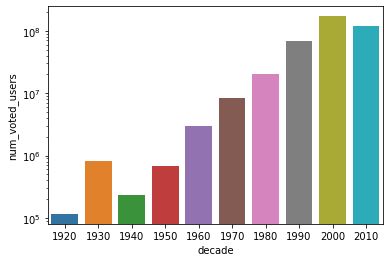

In [194]:
# Write your code for plotting number of voted users vs decade
import seaborn as sns
decade_vote= sns.barplot(x='decade',y='num_voted_users',data=df_by_decade)
plt.yscale('log')
plt.ylabel("num_voted_users")
plt.xlabel("decade")
plt.show()